## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_4_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

Relacione sus datos y los del compañero de trabajo

In [1]:
names = ["Isaac Uribe Jaramilo", "César Augusto Montoya Ocampo"]
emails = ["isaac.uribej@udea.edu.co?", "cesara.montoya1@udea.edu.co"]

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

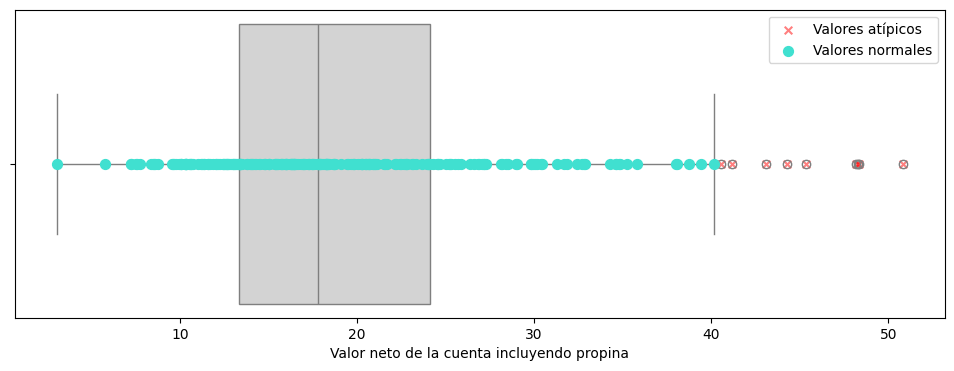

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]


plt.figure(figsize=(12,4))
sns.boxplot(x=total_bill, color="lightgray")
plt.scatter(data_a, [0.0]*len(data_a), color="red", s=30, alpha=0.5, marker = "x", label = "Valores atípicos")
plt.scatter(data_b, [0.00]*len(data_b), color="turquoise", s=50, zorder=5, label = "Valores normales")
plt.legend()
plt.xlabel("Valor neto de la cuenta incluyendo propina")
plt.show()


## Analisis:
De la gráfica de cajas y bigotes se puede observar que el precio neto total de las cuentas que son superiores a $40 se podrian considerar valores atípicos, esto porque se salen del límite superior definido como 1.5 veces el IQR por encima del Q3, estos valor atípicos pueden deberse a propinas "generosas" o compra de platos que tienen precios muy por encima de lo que suele ser popular en el restaurante.

# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

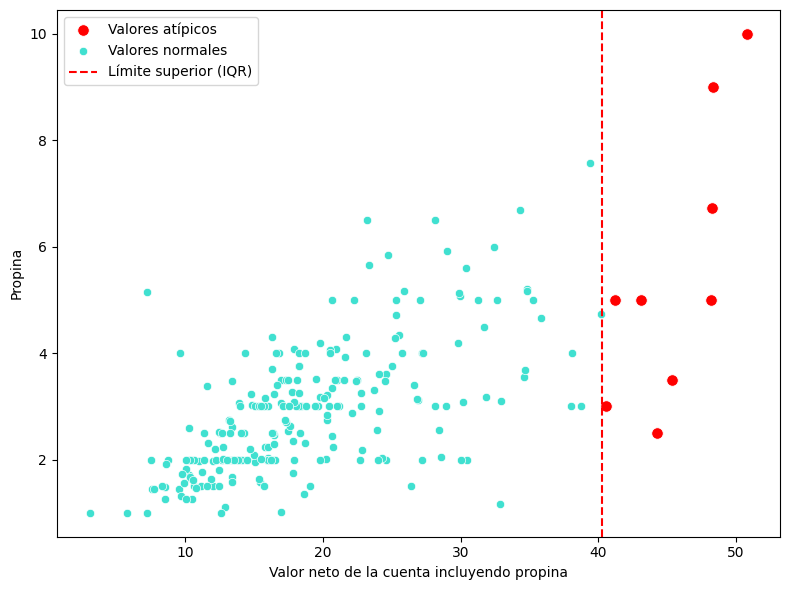

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tips = sns.load_dataset("tips")


data_a = tips[tips["total_bill"] > lim_sup]
data_b = tips[tips["total_bill"] <= lim_sup]

x = tips["total_bill"].values
y = tips["tip"].values

plt.figure(figsize=(8,6))
sns.scatterplot(x=data_a["total_bill"], y=data_a["tip"], color="red", s=70, label="Valores atípicos")
sns.scatterplot(x=data_b["total_bill"], y=data_b["tip"], color="turquoise", label="Valores normales")
plt.xlabel("Valor neto de la cuenta incluyendo propina")
plt.ylabel("Propina")
plt.axvline(x=lim_sup, linestyle='--',color='red', label="Límite superior (IQR)")
plt.legend()

plt.tight_layout()
plt.show()

## Analisis
Basándonos en el análisis anterior se delimitaron aquellos valores netos de la cuenta que excedieran el límite superior, y, utilizando un gráfico de dispersión se observa cómo en efecto hay valores netos que se deben únicamente por propinas exageradas, pero también una gran cantidad de valores que se habían considerado atípicos y no presentan una propina generosa, reforzando la idea de ser platos con precios altos.

# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

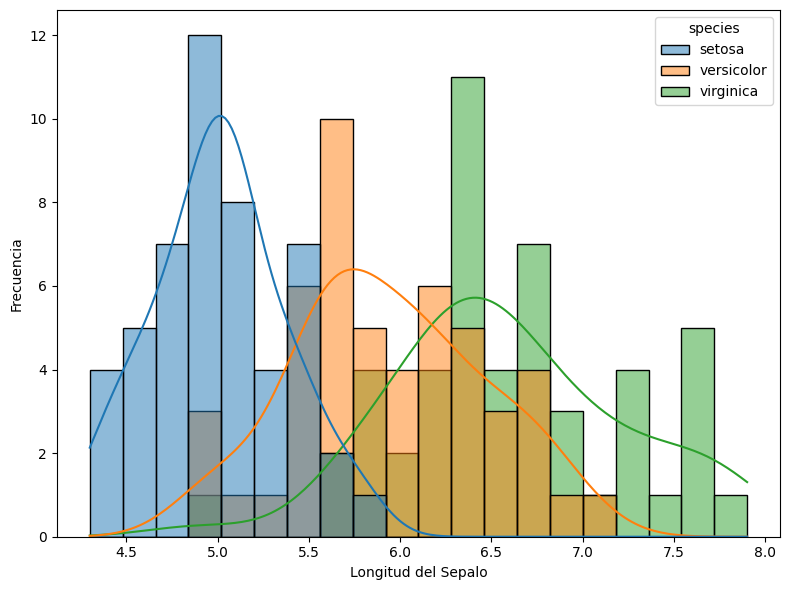

7.9


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


iris = sns.load_dataset("iris")
x = iris["sepal_length"].values
y = iris['species'].values



mean = np.mean(x)
std = np.std(x)
lim_inf = mean - 3 * std
lim_sup = mean + 3 * std

plt.figure(figsize=(8,6))
sns.histplot(data=iris,x='sepal_length', hue='species',bins=20, kde=True, legend=True)
plt.xlabel("Longitud del Sepalo")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()
print(np.max(x))

## Analisis
Como se puede observar en el histograma las especies versicolor y virginica presentan colas un poco alargadas lo que podría sugerir presencia de datos atípicos en la longitud del sépalo para esas especies.

# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

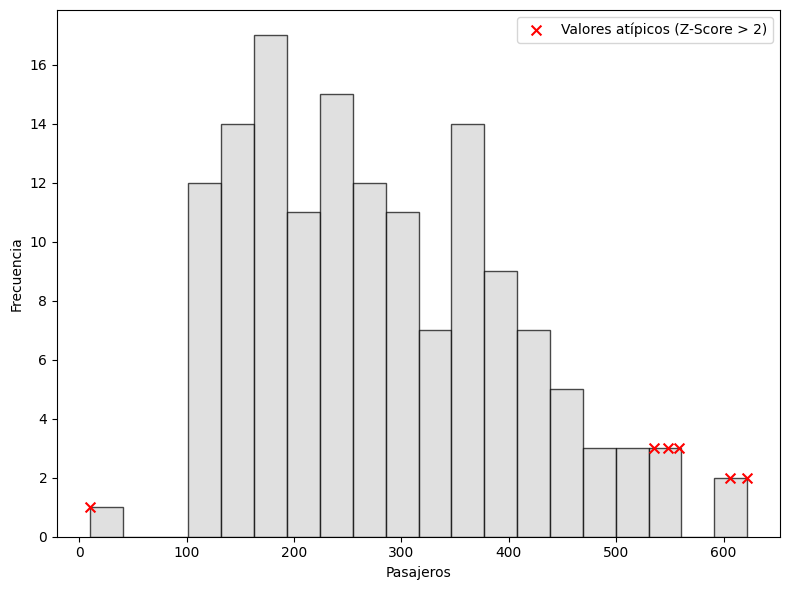

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

flights = sns.load_dataset("flights")
x = flights["passengers"].values
x = np.append(x, [10, 500])

z_scores = zscore(x)
outlier_indices = np.abs(z_scores) > 2

plt.figure(figsize=(8,6))
plt.xlabel("Pasajeros")
plt.ylabel("Frecuencia")

# Plot the histogram and get the bin edges and counts
counts, bins, patches = plt.hist(x, bins=20, color="lightgray", edgecolor='black', alpha=0.7)

# Get the frequency for each outlier
outlier_frequencies = []
for outlier in x[outlier_indices]:
    # Find the bin that the outlier falls into
    bin_index = np.searchsorted(bins, outlier) - 1
    # Ensure the index is within the bounds of the counts array
    bin_index = max(0, min(bin_index, len(counts) - 1))
    outlier_frequencies.append(counts[bin_index])


plt.scatter(x[outlier_indices], outlier_frequencies, color="red", s=50, marker="x", label="Valores atípicos (Z-Score > 2)")
plt.legend()
plt.tight_layout()
plt.show()

## Analisis
Del histograma se pueden observar 6 valores de número de pasajeros por vuelo que son atípicos segun el z-score por tener un valor mayor a 2, pero la clasificación del tipo de atípico no se puede determinar debido a la falta de información proporcionada por el dataset, con esto nos referimos a que la presencia de estos vuelos de baja cantidad de pasajeros puede ser algo normal para vuelos privados, o bien la presencia de vuelos sobrecargados no se sabe si son excesivos para la capacidad de un avión o simplemente hay menos vuelos con esas capacidades.

# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

/tmp/ipython-input-2929590367.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


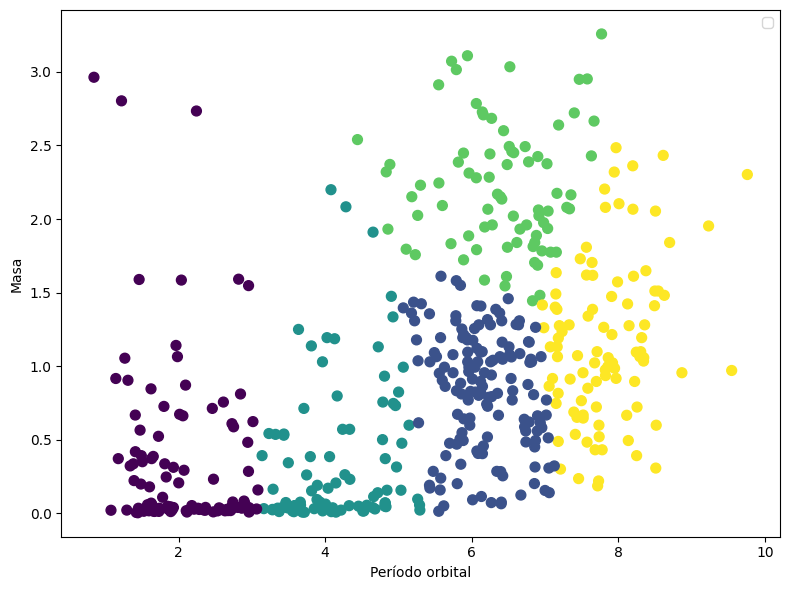

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)

kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8,6))
# Add label to each class
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=50)
plt.xlabel("Período orbital")
plt.ylabel("Masa")
plt.legend()
plt.tight_layout()
plt.show()
